In [3]:
# Dependencies and Setup 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats as st 
from scipy.stats import linregress 
import datetime as datetime

# load cleaned csv 
file_to_load = 'Resources/clean_df.csv'

# Read cleaned data file and store into Pandas df 
cleaned_df = pd.read_csv(file_to_load)

# Display df preview
cleaned_df.head()

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox
0,0,41280,Jefferson Park,2017-12-22,W,6104,False,False,False,False,False
1,1,41000,Cermak-Chinatown,2017-12-18,W,3636,False,False,True,False,False
2,2,40280,Central-Lake,2017-12-02,A,1270,False,False,False,False,False
3,3,40140,Dempster-Skokie,2017-12-19,W,1759,False,False,False,False,False
4,4,40690,Dempster,2017-12-03,U,499,True,False,False,True,False


In [4]:
# Create yearmonth column to use to group dates later
cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])
cleaned_df["yearmonth"] = cleaned_df['date'].apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=1)) 
cleaned_df

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth
0,0,41280,Jefferson Park,2017-12-22,W,6104,False,False,False,False,False,2017-12-01
1,1,41000,Cermak-Chinatown,2017-12-18,W,3636,False,False,True,False,False,2017-12-01
2,2,40280,Central-Lake,2017-12-02,A,1270,False,False,False,False,False,2017-12-01
3,3,40140,Dempster-Skokie,2017-12-19,W,1759,False,False,False,False,False,2017-12-01
4,4,40690,Dempster,2017-12-03,U,499,True,False,False,True,False,2017-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...
196677,1028035,41700,Washington/Wabash,2020-09-26,A,2094,False,False,False,False,False,2020-09-01
196678,1028036,41700,Washington/Wabash,2020-09-27,U,1423,False,False,False,False,False,2020-09-01
196679,1028037,41700,Washington/Wabash,2020-09-28,W,2517,False,False,False,False,False,2020-09-01
196680,1028038,41700,Washington/Wabash,2020-09-29,W,2710,False,False,False,False,False,2020-09-01


In [5]:
## Find mean ridership for Ashland station for days when Bulls play and when they don't play
ashland_df = cleaned_df[cleaned_df['stationname'] == 'Ashland-Lake']
ashland_df

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth
199,199,40170,Ashland-Lake,2017-12-01,W,2568,False,False,True,False,False,2017-12-01
290,290,40170,Ashland-Lake,2017-12-28,W,1457,False,False,False,False,False,2017-12-01
472,472,40170,Ashland-Lake,2017-12-29,W,1547,False,False,True,False,False,2017-12-01
706,706,40170,Ashland-Lake,2017-12-07,W,2382,False,False,False,False,False,2017-12-01
946,946,40170,Ashland-Lake,2017-12-09,A,1164,False,False,True,False,False,2017-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...
192867,1024225,40170,Ashland-Lake,2020-09-26,A,542,False,False,False,False,False,2020-09-01
192868,1024226,40170,Ashland-Lake,2020-09-27,U,355,False,False,False,False,False,2020-09-01
192869,1024227,40170,Ashland-Lake,2020-09-28,W,748,False,False,False,False,False,2020-09-01
192870,1024228,40170,Ashland-Lake,2020-09-29,W,765,False,False,False,False,False,2020-09-01


In [6]:
# Mean ridership at Ashland Station when Bulls play
ashland_bulls_df = cleaned_df[(cleaned_df['stationname'] == 'Ashland-Lake') & (cleaned_df['Bulls'] == True)]
print(ashland_bulls_df['rides'].mean())

2028.5676855895197


In [7]:
# Create DataFrame for Ashland Station when Bulls don't play
ashland_bulls_df = cleaned_df[(cleaned_df['stationname'] == 'Ashland-Lake') & (cleaned_df['Bulls'] == False)]
ashland_bulls_df

# print Ashland mean ridership when bulls don't play
print(ashland_bulls_df['rides'].mean())

1769.2912280701755


In [8]:
# Find mean ridership for IMD station when Bulls play and when they don't play

# Create dataframe for IMD station only
imd_df = cleaned_df[cleaned_df['stationname'] == 'Medical Center']
imd_df

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth
235,235,40810,Medical Center,2017-12-24,U,307,False,False,False,True,False,2017-12-01
375,375,40810,Medical Center,2017-12-05,W,2452,False,False,False,False,False,2017-12-01
719,719,40810,Medical Center,2017-12-25,U,240,False,False,False,False,False,2017-12-01
1097,1097,40810,Medical Center,2017-12-17,U,579,True,False,False,False,False,2017-12-01
1124,1124,40810,Medical Center,2017-12-06,W,2339,False,False,True,False,False,2017-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...
194637,1025995,40810,Medical Center,2020-09-26,A,413,False,False,False,False,False,2020-09-01
194638,1025996,40810,Medical Center,2020-09-27,U,279,False,False,False,False,False,2020-09-01
194639,1025997,40810,Medical Center,2020-09-28,W,842,False,False,False,False,False,2020-09-01
194640,1025998,40810,Medical Center,2020-09-29,W,862,False,False,False,False,False,2020-09-01


In [9]:
# Create Dataframe for IMD station when Bulls play
imd_bulls_df = imd_df[(imd_df['Bulls'] == True)]  

# Mean ridership at IMD station when Bulls play
print(imd_bulls_df['rides'].mean())

2063.109170305677


In [10]:
# Mean ridership at IMD station when Bulls don't play
imd_bulls_df = imd_df[(imd_df['Bulls'] == False)]
print(imd_bulls_df['rides'].mean())

1739.319298245614


<AxesSubplot:xlabel='yearmonth'>

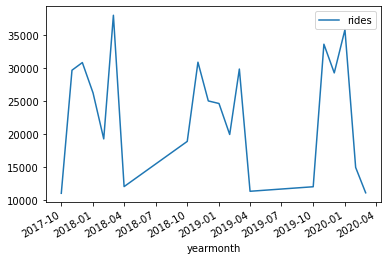

In [11]:
# Create line graph for Bulls ridership at Ashland station for 2017-2019
ashland_bulls = ashland_df[ashland_df['Bulls'] == True]
gb = ashland_bulls.groupby('yearmonth').sum('rides')
gb.reset_index(inplace=True)
gb.plot.line(x='yearmonth', y='rides')

<AxesSubplot:xlabel='yearmonth'>

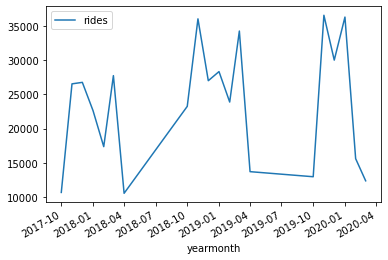

In [12]:
# Create line graph for Bulls ridership at IMD station for 2017-2019  
imd_bulls = imd_df[imd_df['Bulls'] == True]
#imd_2017 
gb = imd_bulls.groupby('yearmonth').sum("rides")
gb.reset_index(inplace=True)
gb.plot.line(x='yearmonth', y='rides')

In [13]:
gb

,yearmonth,Unnamed: 0,station_id,rides,Blackhawks,Cubs,Bulls,Bears,White Sox
0,2017-10-01,3467991,204050,10644,1,0,5,0,0
1,2017-11-01,7600587,612150,26542,3,0,15,1,0
2,2017-12-01,47292,652960,26760,1,0,16,0,0
3,2018-01-01,184920,612150,22616,5,0,15,0,0
4,2018-02-01,105579,408100,17347,0,0,10,0,0
5,2018-03-01,189034,612150,27744,2,0,15,0,0
6,2018-04-01,154475,244860,10517,1,1,6,0,3
7,2018-10-01,369997,326480,23244,1,0,8,0,0
8,2018-11-01,758143,612150,36058,2,0,15,0,0
9,2018-12-01,769466,571340,27004,1,0,14,0,0


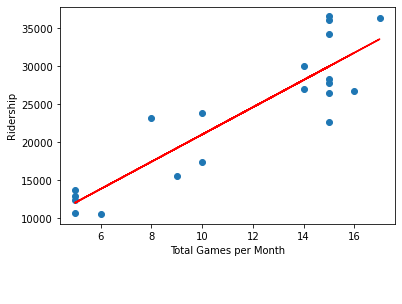

In [40]:
# Linear Regression for Bulls Games 2017-2019
x_values = gb['Bulls']
y_values = gb['rides']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(6,10),fontsize=15,color='red')
plt.xlabel('Total Games per Month')
plt.ylabel('Ridership')
plt.show()  

In [41]:
# Pearson Correlation Coefficient
total_games = gb.iloc[:,0]
ridership = gb.iloc[:,1]

#Use Pearson correlation coefficient
print(f'Correlation is {round(rvalue,2)}')

Correlation is 0.9
